In [1]:
### ESTA ETAPA ESTÁ EM DESENVOLVIMENTO, TODAS AS INFORMAÇÕES AQUI PRESENTES NECESSITAM DE REVISÃO.

### Start (13:56)[11 de abril]

In [2]:
%matplotlib inline
import geopandas as gpd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'geopandas'

%matplotlib widgetComo um primeiro passo, vamos nos familiarizar com o banco de dados dados do SGB para que seja possível construir um novo banco tratado.

- #1  criar uma malha territorial subdividida em folhas na escala de 1 :100.000 contidas na folha SF 23 (1 : 1.000.000). *Sendo esta uma etapa de teste que pode ser ampliada para uma área maior.
- #2  analisar a nossa base de dados geológica observando descrições Litológicas e de Legendas além de suas correlações litoestrátigráficas.
- #3  filtrar as geometrias a partir destas descrições assim como as descrições de suas ocorrências minerais caso haja.

O primeiro passo deve ser a familiarização das funções destas bibliotecas seguindo os tutoriais de cada uma das bibliotecas que utilizaremos, os tutoriais são simples e diretos, são ótimos jeitos de se entender do que se tratam as funções definidas nos pacotes que fazemos o 'import'.

### Lendo e Escrevendo arquivos

O primeiro passo é observar os nossos dados geoespaciais no mapa interativo [GeologiaGIS](https://geoportal.cprm.gov.br/geosgb/), aqui poderemos identificar as regiões onde houve coleta de dados, sejam eles geológicos ou geofísicos, podemos, também, além disto, realizar algumas operações com este banco de dados como recortar e filtrar os dados para proseguir paara o download.


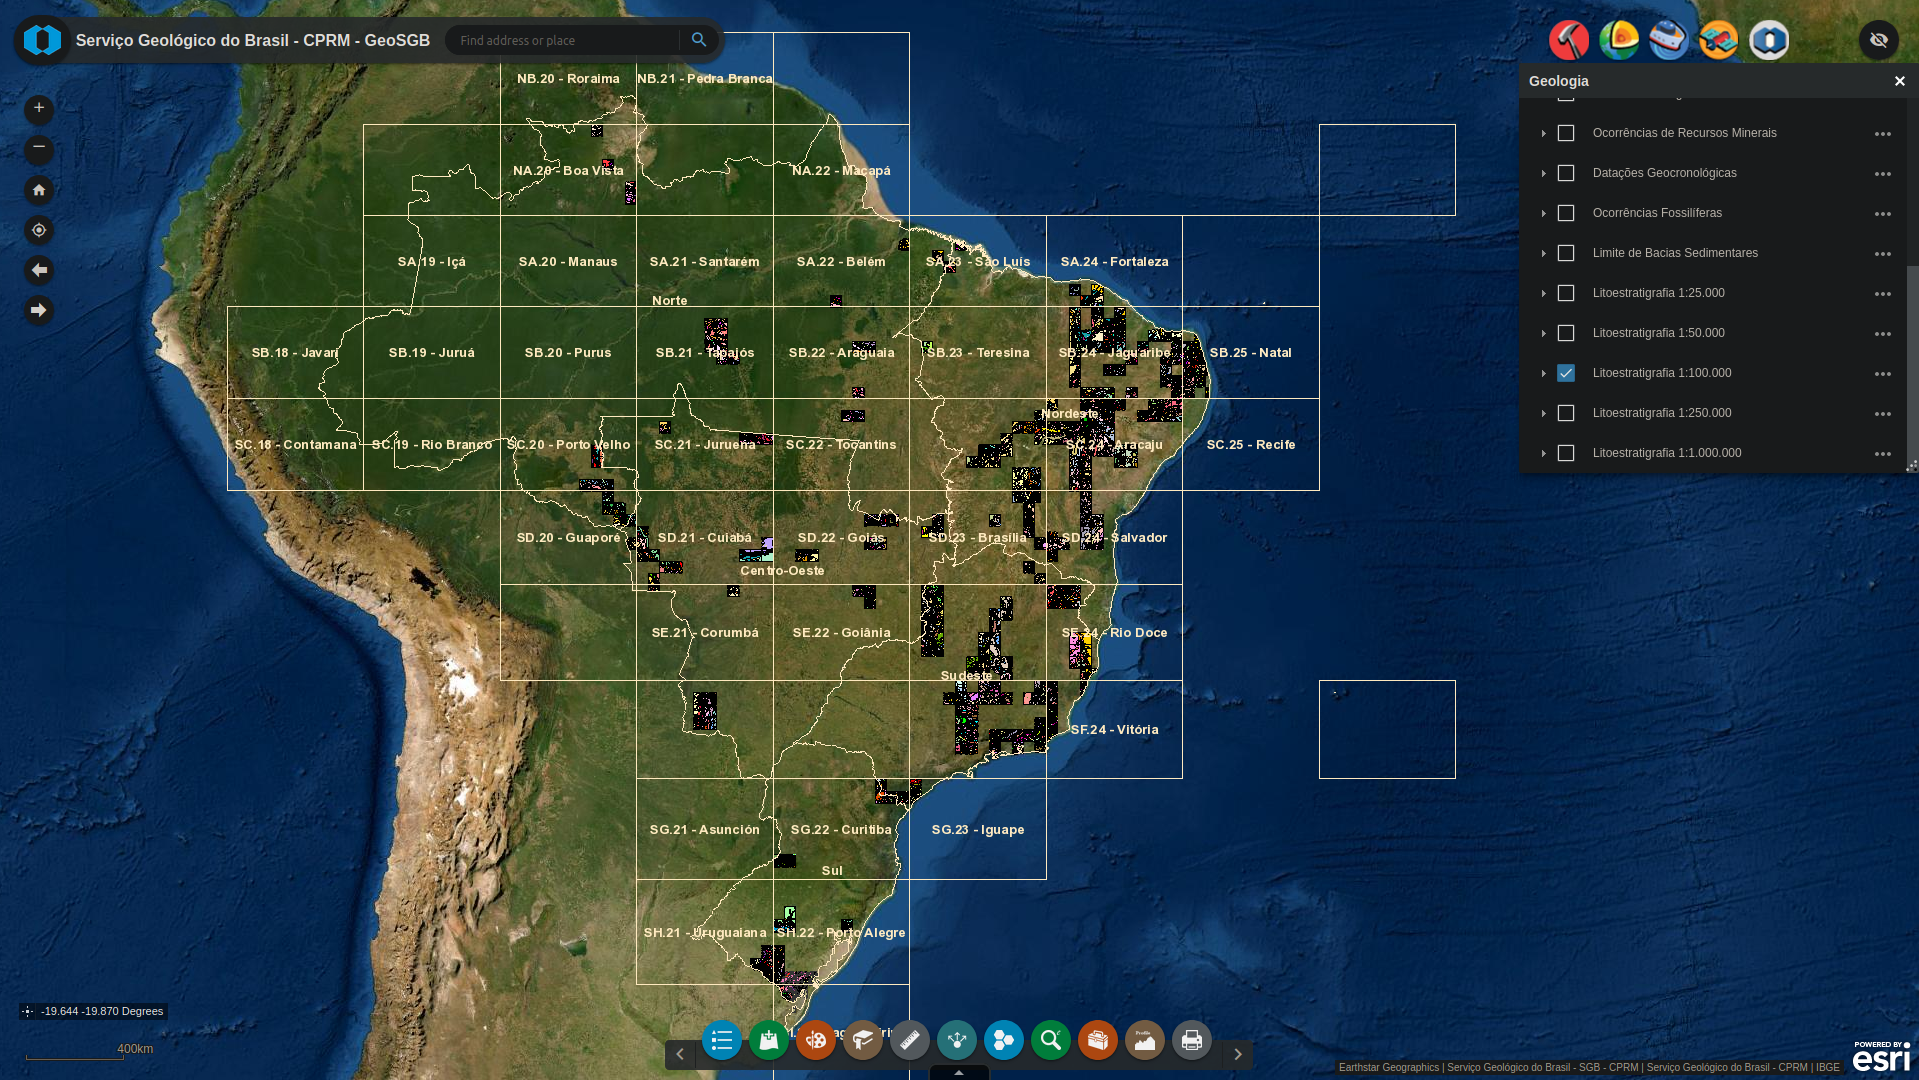


Nesta aba de geoprocessamento, podemos escolher quais camadas serão adicionadas ao pacote de download.
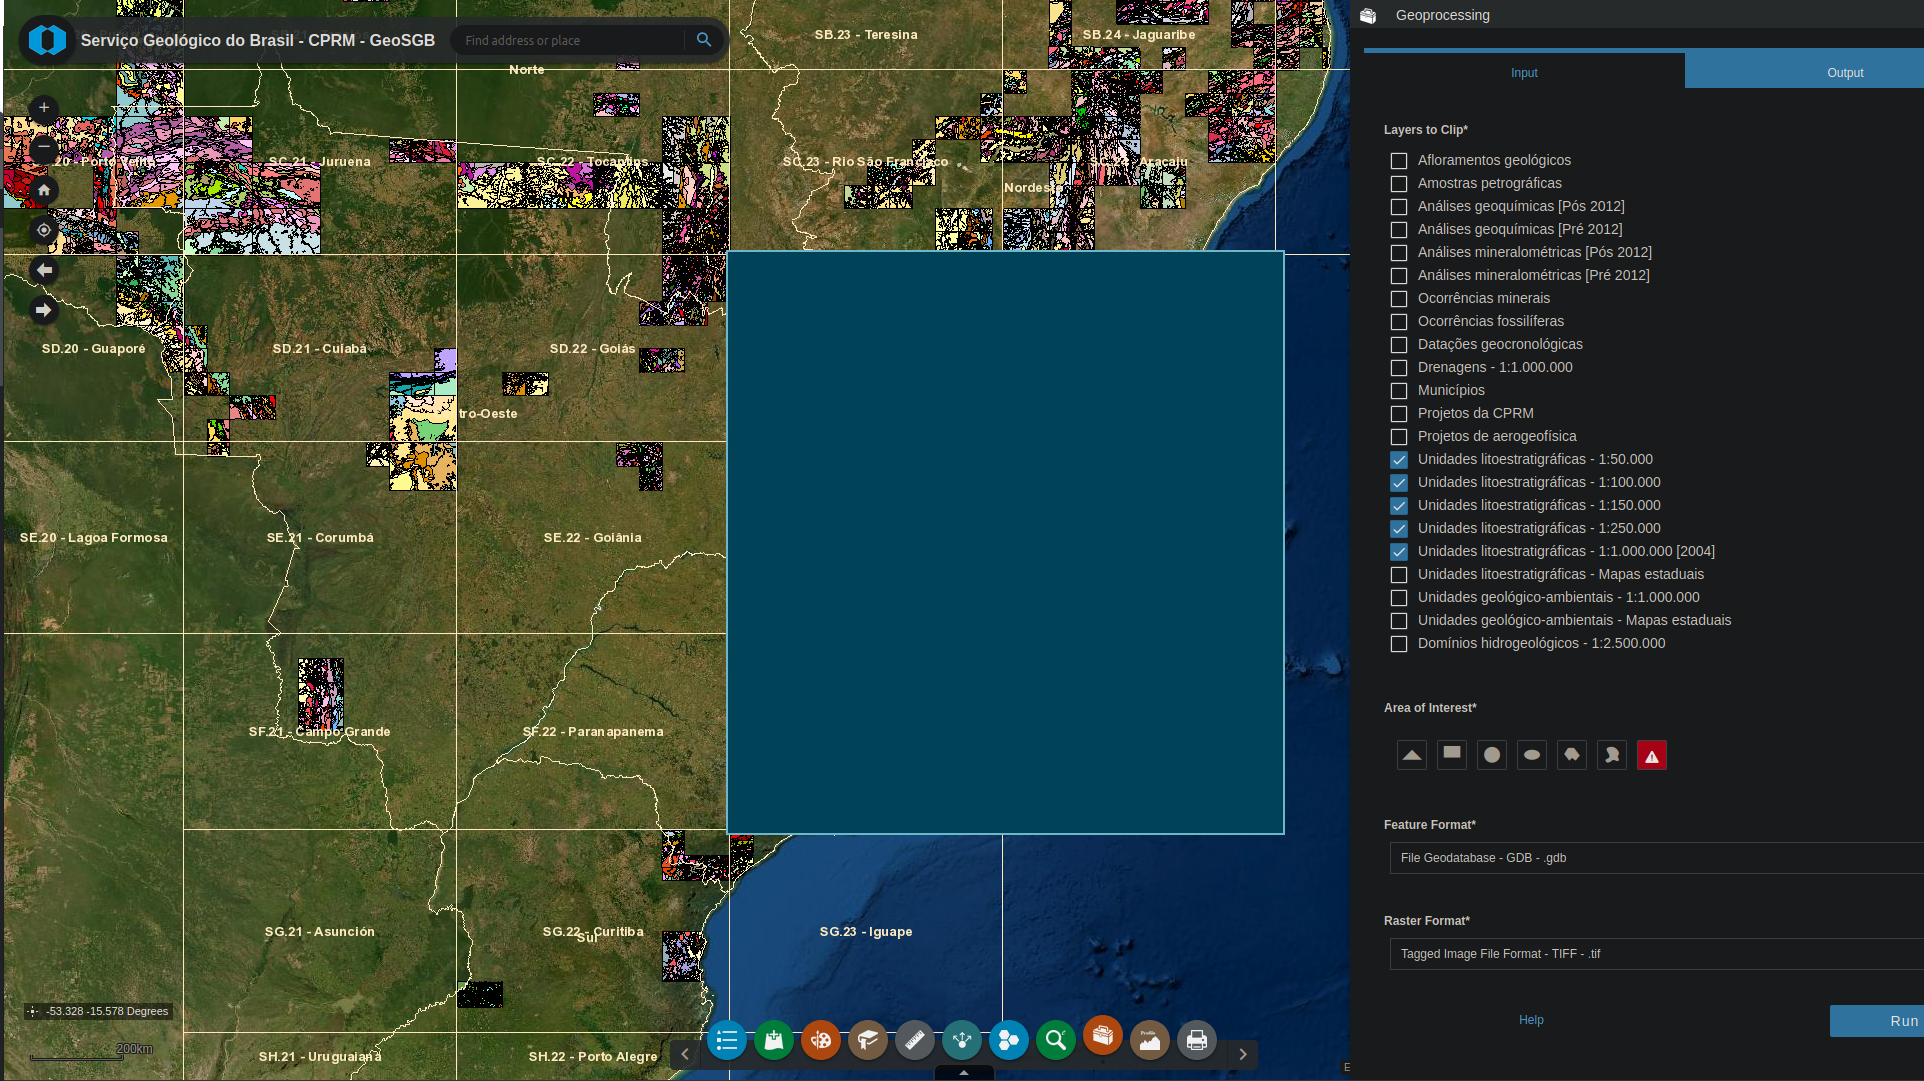


Além desta plataforma online de visualização interativa, é possível adquirir-mos mais dados nos repositórios [RIGEO](http://rigeo.cprm.gov.br/) e [geo SGB CPRM - Downloads](http://geosgb.cprm.gov.br/geosgb/downloads.html) de uma forma mais manual pesquisando os nomes dos arquivos ou navegando pelas pastas.


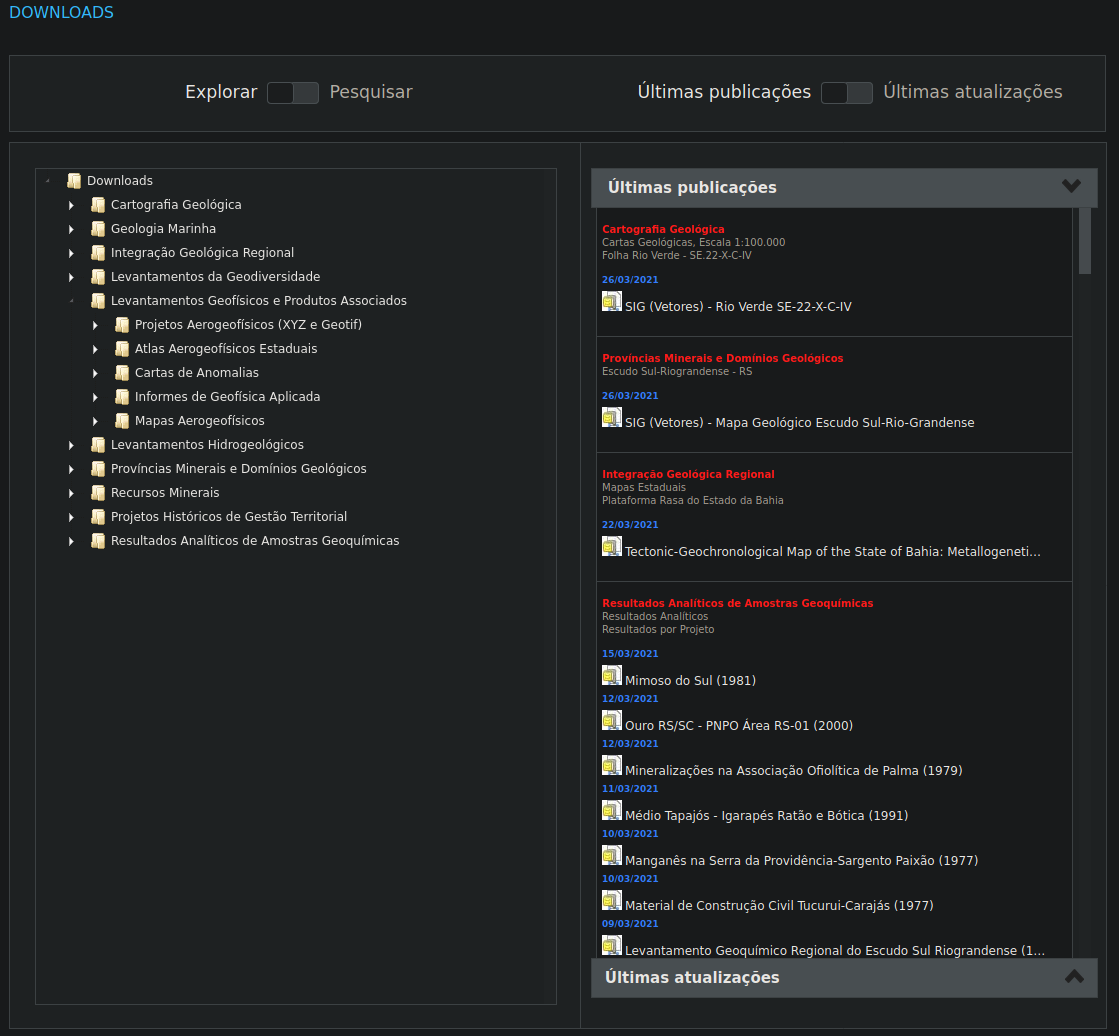

- Em seguida informamos com alguns comandos em python que serão traduzidos para comandos interpretáveis pela CPU que farão armazenar na RAM os dados dos arquivos baixados e salvos no HD ou SSD. 

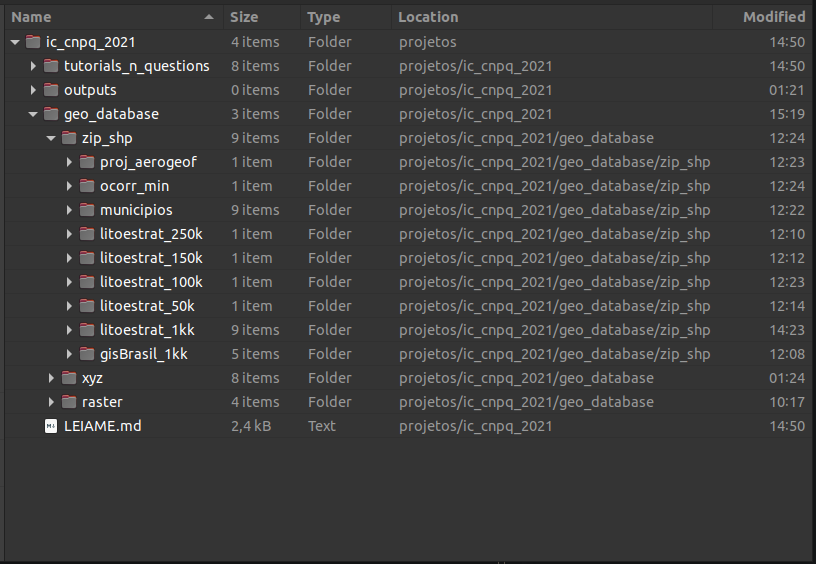

A RAM é um local de rápido acesso o que nos proporciona as manipulações algébricas destes valores, desvendando novas informações úteis sobre nosso dado. Com as funções da biblioteca GeoPandas poderemos calcular valores de distâncias e localização geográfica e algumas outras informações.

## Hands'on

Com posse dos dados vetoriais de nossas geometrias formatados em um arquivo compatível(e.g. GeoPackage, GeoJSON, Shapefile), nós podemos facilmente lê-los usando a função gpd.read_file(), a qual automaticamente detecta o tipo do arquivo e cria um obejto GeoDataFrame.

No exemplo a seguir, nós usaremos as Folhas mapeadas na escala de 1 : 1.000.000 da base de dados do SGB.


Leia mais em [geopandas.read_file()](https://geopandas.org/docs/reference/api/geopandas.read_file.html#geopandas.read_file).

####  Lendo os dados

GeoPandas pode ler praticamente qualquer dado espacial baseado em vetores incluindo ESRI shapefiles, GeoJSON files, e outros, usando o comando :

- gepandas.read_files()

O qual retornará um objeto GeoDataFrame.

Isto é possível pelo fato do GeoPandas fazer uso da grande biblioteca [fiona](http://fiona.readthedocs.io/en/latest/manual.html), que, por sua vez, faz uso do robusto programa de código-livre chamado [GDAL/OGR](http://www.gdal.org/) desenvolvido para facilitar transformações geoespaciais. Qualquer argumento passado ao geopandas.read_file() após o argumento 'nome do arquivo' será entregue diretamente ao fiona.open, que é quem realmente importa os dados. No geral, geopandas.read_file() é bem esperto e deve o que você deseja sem argumentos extras, mas para mais informações digite:

import fiona; help(fiona.open)

### Disclaimer
*Adendo sobre as dificuldades encontradas e os contornos executados*

Como as ferramentas da biblioteca GeoPandas ainda não estão 100% compreendidas o Software Livre QGIS nos fornece capabilidades similares as da biblioteca porém com uma interface gráfica que nos é mais familiar.
Com as ferramentas de Filtros por regras do QGIS foi possível selecionar as geometrias representativas na escala de 1 : 1.000.000 de nossas unidades grafitosas.
Estas ferramentas nos proporcionam o entendimento da distribuição espacial de nossos interesses possibilitando a delimitação de uma área de estudos.


*ESTA ETAPA ESTÁ MUITO MECÂNICA E PODE SER AUTOMATIZADA SE A FUNÇÃO GeoPandas.read_file() FOR CAPAZ DE RECONHECER O "HTTP:/PATH" DA BASE DE DADOS ONLINE DO SGB*

In [5]:
# abrindo unidades litoestratigráficas em escala de 1 : 1.000.000 de nossa área 
lito_1kk = gpd.read_file('/home/nazumpa/projetos/ic_cnpq_2021/geo_database/zip_shp/litoestrat_1kk/Unidades_litoestratigr├бficas___1_1_000_000__2004_.shp')
lito_1kk

ID_UNIDADE           SIGLA    HIERARQUIA  \
0             214            N12s      Formação   
1            2054            K2ra      Formação   
2             396            K2mo      Formação   
3            2054            K2ra      Formação   
4             214            N12s      Formação   
...           ...             ...           ...   
46710        2411  NP3_gamma_2di5         Corpo   
46711         409            K12a      Formação   
46712        1507             Q2a  Não definida   
46713          95            Q2pm  Não definida   
46714        1521            Q1ec  Não definida   

                                  NOME             AMBIENTE_T  \
0                    Formação Solimões                   None   
1                    Formação Rio Azul                   None   
2                         Formação Moa                   None   
3                    Formação Rio Azul                   None   
4                    Formação Solimões                   None   
...                                ...                    ...   
46710     Corpo Plúton sem denominação                   None   
46711                     Formação Açu                   None   
46712            Depósitos aluvionares  Cobertura superficial   
46713  Depósitos de pântanos e mangues  Cobertura superficial   
46714   Depósitos eólicos continentais                   None   

                             SUB_AMBIEN      SIGLA_PAI  \
0                                  None           None   
1                                  None           None   
2                                  None           None   
3                                  None           None   
4                                  None           None   
...                                 ...            ...   
46710                              None  NP3_gamma_3di   
46711                              None          K12ap   
46712                              None           None   
46713  Cobertura transportada(Clástica)           None   
46714                              None           None   

                                        NOME_PAI  \
0                                           None   
1                                           None   
2                                           None   
3                                           None   
4                                           None   
...                                          ...   
46710  NP3_gamma_3di - Suíte intrusiva Dona Inês   
46711                        K12ap - Grupo Apodi   
46712                                       None   
46713                                       None   
46714                                       None   

                                                 LEGENDA       ESCALA  ...  \
0      Sedimento pelítico, flúvio lacustre, contendo ...  1:1.000.000  ...   
1      Folhelho cinza a castanho e arenito fino com n...  1:1.000.000  ...   
2      Arenito fino a médio, com estratificação cruza...  1:1.000.000  ...   
3      Folhelho cinza a castanho e arenito fino com n...  1:1.000.000  ...   
4      Sedimento pelítico, flúvio lacustre, contendo ...  1:1.000.000  ...   
...                                                  ...          ...  ...   
46710  Biotita e/ou hornblenda granito e leucogranito...  1:1.000.000  ...   
46711  Arenito quartzoso, arcóseo a subarcóseo de gra...  1:1.000.000  ...   
46712  Sedimentos sreno-argilosos aluvionares inconso...  1:1.000.000  ...   
46713  Sedimentos argilo-arenosos, mal selecionados, ...  1:1.000.000  ...   
46714  Areia fina a média, amarelada, pouco consolida...  1:1.000.000  ...   

               ERA_MIN          ERA_MAX  SISTEMA_MI  SISTEMA_MA   EPOCA_MIN  \
0            Cenozóico        Cenozóico     Neogeno     Neogeno    Superior   
1            Mesozóico        Mesozóico    Cretáceo    Cretáceo    Inferior   
2            Mesozóico        Mesozóico    Cretáceo    Cretáceo    Inferior   
3            Mesozóico        Mesozóic

### Escrevendo arquivos (Esta é a ferramenta que nos possibilitará a criação do arquivo */geopackage.gpkg*, a nossa Data Base)
Escrevendo um GeoDataFrame que está na RAM do seu PC volta para um arquivo em sua unidade de armazenamento como um arquivo *~/.gpkg* é similarmente simples, usando *GeoDataFrame.to_file*. Por padrão, o arquivo será formatado como um */Shapefile.shp*, mas poderemos especificar um formato específico usando a *Driver Keyword*.

### Escrever arquivos

Escrever um GeoDataFrame de volta da RAM para um arquivo no HD (SSD) é similarmente simples, usando GeoDataFrame.to_file. O default é o formato Shapefile, mas podemos especificar utilizando nossa própria palavra chave de driver (GeoPackage).

Veja mais informações sobre [Lendo e Escrevendo arquivos](https://geopandas.org/docs/user_guide/io.html)

In [6]:
lito_1kk.to_file("/home/nazumpa/projetos/ic_cnpq_2021/geo_database/un_litoestratigraficas.gpkg",
                    driver='GPKG',
                    layer='litoestrat_1kk')

In [7]:
# Unidades Litoestratigráficas na escala de 1 : 250.000
lito_250k = gpd.read_file('/home/nazumpa/projetos/ic_cnpq_2021/geo_database/zip_shp/litoestrat_250k/Unidades_litoestratigr├бficas___1_250_000.shp')

lito_250k.to_file("/home/nazumpa/projetos/ic_cnpq_2021/geo_database/un_litoestratigraficas.gpkg",
                    driver='GPKG',
                    layer='litoestrat_250k')


# Unidades Litoestratigráficas na escalada de 1 : 100.000
lito_100k = gpd.read_file('/home/nazumpa/projetos/ic_cnpq_2021/geo_database/zip_shp/litoestrat_100k/Unidades_litoestratigráficas___1_100_000.shp')

lito_100k.to_file("/home/nazumpa/projetos/ic_cnpq_2021/geo_database/un_litoestratigraficas.gpkg",
                    driver='GPKG',
                    layer='litoestrat_100k')


# Unidades Litoestratigráficas na escalada de 1 : 50.000
lito_50k = gpd.read_file('/home/nazumpa/projetos/ic_cnpq_2021/geo_database/zip_shp/litoestrat_50k/Unidades_litoestratigráficas___1_50_000.shp')

lito_50k.to_file("/home/nazumpa/projetos/ic_cnpq_2021/geo_database/un_litoestratigraficas.gpkg",
                    driver='GPKG',
                    layer='litoestrat_50k')

### Projeções
Cada GeoSeries possui o Sistema de Referência de Coordenada acessível como GeoSereie.crs.O SRC informa ao GeoPandas onde as coordenadas das geometrias se localizam na Terra. Em alguns casos, o SRC é geográfico, o que significa que as coordenadas estão em LATITUDE e LONGIDUTE. Nestes casos, é comumente utilizado o WGS84, com o 'authority code' EPSPG:4326. Vamos ver a projeção do nosso GeoDataFrame.

In [3]:
# Unidades Litoestratigráficas na escalada de 1 : 1.000.000
lito_1kk = gpd.read_file("/home/nazumpa/projetos/ic_cnpq_2021/geo_database/un_litoestratigraficas.gpkg",
                    driver='GPKG',
                    layer='litoestrat_1kk')

# Unidades Litoestratigráficas na escala de 1 : 250.000
lito_250k = gpd.read_file("/home/nazumpa/projetos/ic_cnpq_2021/geo_database/un_litoestratigraficas.gpkg",
                    driver='GPKG',
                    layer='litoestrat_250k')

# Unidades Litoestratigráficas na escalada de 1 : 100.000
lito_100k = gpd.read_file("/home/nazumpa/projetos/ic_cnpq_2021/geo_database/un_litoestratigraficas.gpkg",
                    driver='GPKG',
                    layer='litoestrat_100k')


# Unidades Litoestratigráficas na escalada de 1 : 50.000
lito_50k = gpd.read_file("/home/nazumpa/projetos/ic_cnpq_2021/geo_database/un_litoestratigraficas.gpkg",
                    driver='GPKG',
                    layer='litoestrat_50k')

In [4]:
lito_1kk = lito_1kk.set_geometry('geometry')
print(lito_1kk.crs)


lito_250k = lito_250k.set_geometry('geometry')
print(lito_250k.crs)


lito_100k = lito_100k.set_geometry('geometry')
print(lito_100k.crs)

lito_50k = lito_50k.set_geometry('geometry')
print(lito_50k.crs)

epsg:4326
epsg:4326
epsg:4326
epsg:4326


As geometrias estão em WGS84 e como estamos lidando com uma base de dados do território nacional inteiro, esta projeção se faz útil.

Seguindo com o comando GeoDataFrame.shape podemos observar como a estrutura do dado se comporta com relação ao seu tamnho/forma. Com isto, podemos identificar 46.715 linhas de geometrias descritas em 27 colunas.

In [5]:
print(lito_1kk.shape)

print(lito_250k.shape)

print(lito_100k.shape)

print(lito_50k.shape)

(46715, 27)
(18642, 27)
(59268, 27)
(2796, 27)


Com o comando GeoDataFrame.columns podemos observar quais são estas 27 colunas e o dtype

In [6]:
print(lito_1kk.columns)

print(lito_250k.columns)

print(lito_100k.columns)

print(lito_50k.columns)

Index(['ID_UNIDADE', 'SIGLA', 'HIERARQUIA', 'NOME', 'AMBIENTE_T', 'SUB_AMBIEN',
       'SIGLA_PAI', 'NOME_PAI', 'LEGENDA', 'ESCALA', 'MAPA', 'LITOTIPOS',
       'RANGE', 'IDADE_MIN', 'IDADE_MAX', 'EON_MIN', 'EON_MAX', 'ERA_MIN',
       'ERA_MAX', 'SISTEMA_MI', 'SISTEMA_MA', 'EPOCA_MIN', 'EPOCA_MAX',
       'SIGLAS_HIS', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry'],
      dtype='object')
Index(['ID_UNIDADE', 'SIGLA', 'HIERARQUIA', 'NOME', 'AMBIENTE_T', 'SUB_AMBIEN',
       'SIGLA_PAI', 'NOME_PAI', 'LEGENDA', 'ESCALA', 'MAPA', 'LITOTIPOS',
       'RANGE', 'IDADE_MIN', 'IDADE_MAX', 'EON_MIN', 'EON_MAX', 'ERA_MIN',
       'ERA_MAX', 'SISTEMA_MI', 'SISTEMA_MA', 'EPOCA_MIN', 'EPOCA_MAX',
       'SIGLAS_HIS', 'SHAPE_AREA', 'SHAPE_LEN', 'geometry'],
      dtype='object')
Index(['ID_UNIDADE', 'SIGLA', 'HIERARQUIA', 'NOME', 'AMBIENTE_T', 'SUB_AMBIEN',
       'SIGLA_PAI', 'NOME_PAI', 'LEGENDA', 'ESCALA', 'MAPA', 'LITOTIPOS',
       'RANGE', 'IDADE_MIN', 'IDADE_MAX', 'EON_MIN', 'EON_MAX', 'ERA_MIN',
   

### Agora precisamos obeservar os valores das colunas com a função *GeoDataFrame['column_name'].unique()*

In [ ]:
'Carta geológica da folha Varginha - UFRJ'

In [77]:
lista_Mapa_1kk = list(lito_1kk.MAPA.unique())
lista_Mapa_250k = list(lito_250k.MAPA.unique())
lista_Mapa_100k = list(lito_100k.MAPA.unique())
lista_Mapa_50k = list(lito_50k.MAPA.unique())

In [ ]:
(['Grafita xisto, Muscovita xisto, Quartzo xisto'],
 ['Biotita xisto, Grafita xisto, Muscovita-granada xisto, Silimanita-granada xisto'],
 ['Formação ferrífera bandada, Grafita xisto, Kinzigito, Metamáfica, Paragnaisse, Rocha calcissilicática, Rocha metaultramáfica'],
 ['Grafita xisto, Metapelito, Muscovita quartzito, Quartzito'],
 ['Biotita gnaisse, Gnaisse, Gondito, Grafita xisto, Granada gnaisse, Kinzigito, Mármore, Muscovita quartzito, Quartzito, Rocha calcissilicática, Sericita xisto, Xisto'],
 ['Biotita xisto, Biotita-muscovita-quartzo xisto, Grafita xisto, Granada-biotita-muscovita-quartzo xisto, Granada-clorita xisto, Mármore, Metaconglomerado suportado por clastos, Metapsamito, Metarcóseo, Quartzito ferruginoso'],
 ['Formação ferrífera bandada, Grafita xisto, Mármore, Metakomatiíto, Metamáfica, Quartzito ferruginoso, Rocha calcissilicática, Xisto']
)

In [10]:
lista_LITOTIPOS_1kk  = list(lito_1kk.LITOTIPOS.unique())
lista_LITOTIPOS_250k = list(lito_250k.LITOTIPOS.unique())
lista_LITOTIPOS_100k = list(lito_100k.LITOTIPOS.unique())
lista_LITOTIPOS_50k = list(lito_50k.LITOTIPOS.unique())

In [11]:
lista_LEGENDA_1kk = list(lito_1kk.LEGENDA.unique())
lista_LEGENDA_250k = list(lito_250k.LEGENDA.unique())
lista_LEGENDA_100k = list(lito_100k.LEGENDA.unique())
lista_LEGENDA_50k = list(lito_50k.LEGENDA.unique())

In [53]:
list(lista_LITOTIPOS_1kk)

['Arenito, Argilito, Conglomerado, Siltito',
 'Arenito, Folhelho',
 'Arenito, Conglomerado polimítico',
 'Quartzo sienito, Quartzo traquito',
 'Areia, Argila, Cascalho',
 'Areia, Argila, Cascalho, Linhito, Turfa',
 'Areia, Areia arcoseana, Argila, Cascalho, Conglomerado polimítico, Silte',
 'Metadiorito, Metagranodiorito, Metamonzogranito, Metatonalito',
 'Filito, Itabirito, Metapelito, Mica quartzito, Quartzito ferruginoso, Quartzo arenito',
 'Augen gnaisse, Metagranitóide',
 'Granito, Monzogranito, Sienogranito',
 'Paragnaisse, Paramigmatito, Xisto',
 'Granodiorito, Monzogranito, Sienogranito',
 'Monzogranito, Sienogranito',
 'Granodiorito, Metagranodiorito, Metamáfica, Metamonzogranito, Metavulcânica félsica, Migmatito, Monzogranito, Quartzo diorito, Rocha metassedimentar, Tonalito, Tonalito gnáissico',
 'Gnaisse granítico, Gnaisse granodiorítico, Migmatito estromático, Ortognaisse tonalítico',
 'Quartzo arenito',
 'Biotita sienogranito, Granito, Monzogranito',
 'Albita sienito, Gra

In [78]:
grafítico = [s for s in lito_1kk.LITOTIPOS if "graf" in s]
grafítico

['Filito grafítico, Mica xisto, Quartzito, Rocha calcissilicática',
 'Filito grafítico, Metabasalto komatiítico, Metachert, Metakomatiíto, Metavulcânica félsica, Rocha metavulcânica intermediária, Serpentinito',
 'Filito grafítico, Metabasalto komatiítico, Metachert, Metakomatiíto, Metavulcânica félsica, Rocha metavulcânica intermediária, Serpentinito',
 'Filito, Filito grafítico, Metarenito, Metarritmito, Metassiltito, Mica xisto, Quartzito, Quartzito arcoseano, Xisto',
 'Filito, Filito grafítico, Metarenito, Metarritmito, Metassiltito, Mica xisto, Quartzito, Quartzito arcoseano, Xisto',
 'Filito grafítico, Mica xisto, Quartzito, Rocha calcissilicática',
 'Filito grafítico, Mica xisto, Quartzito, Rocha calcissilicática',
 'Filito grafítico, Metabasalto komatiítico, Metachert, Metakomatiíto, Metavulcânica félsica, Rocha metavulcânica intermediária, Serpentinito',
 'Filito, Filito grafítico, Metarenito, Metarritmito, Metassiltito, Mica xisto, Quartzito, Quartzito arcoseano, Xisto',
 'Fi

In [93]:
Grafita_xisto = [filtro for filtro in lito_1kk.LITOTIPOS.unique() if "Grafita xisto" in filtro]
Grafita_xisto

['Formação ferrífera bandada, Grafita xisto, Metachert, Rocha metassedimentar, Rocha metavulcânica ultramáfica, Serpentinito',
 'Biotita xisto, Biotita-muscovita-quartzo xisto, Grafita xisto, Granada-biotita-muscovita-quartzo xisto, Granada-clorita xisto, Mármore, Metaconglomerado suportado por clastos, Metapsamito, Metarcóseo, Quartzito ferruginoso',
 'Biotita gnaisse, Gnaisse, Gondito, Grafita xisto, Granada gnaisse, Kinzigito, Mármore, Muscovita quartzito, Quartzito, Rocha calcissilicática, Sericita xisto, Xisto',
 'Clorita xisto, Grafita xisto, Hornblenda gnaisse, Metacalcário, Muscovita quartzito, Muscovita-biotita xisto, Quartzito ferruginoso, Talco xisto',
 'Clorita xisto, Grafita xisto, Metachert, Metadacito, Metatufo, Xisto',
 'Grafita xisto, Metachert, Muscovita quartzito, Quartzito ferruginoso, Xisto, Xisto aluminoso',
 'Biotita gnaisse, Clorita xisto, Grafita xisto, Metaconglomerado, Metapelito, Metarritmito, Mica xisto, Paragnaisse, Turmalinito',
 'Clorita xisto, Cloritito

In [94]:
# Filtro geométrico dos LITOTIPOS grafitosos das Cartas geológicas da folhas mapeadas na escala de 1 : 1.000.000
grafita_xisto = (lito_1kk[lito_1kk['LITOTIPOS'] ==  Grafita_xisto])

ValueError: ('Lengths must match to compare', (46715,), (29,))

<AxesSubplot:>

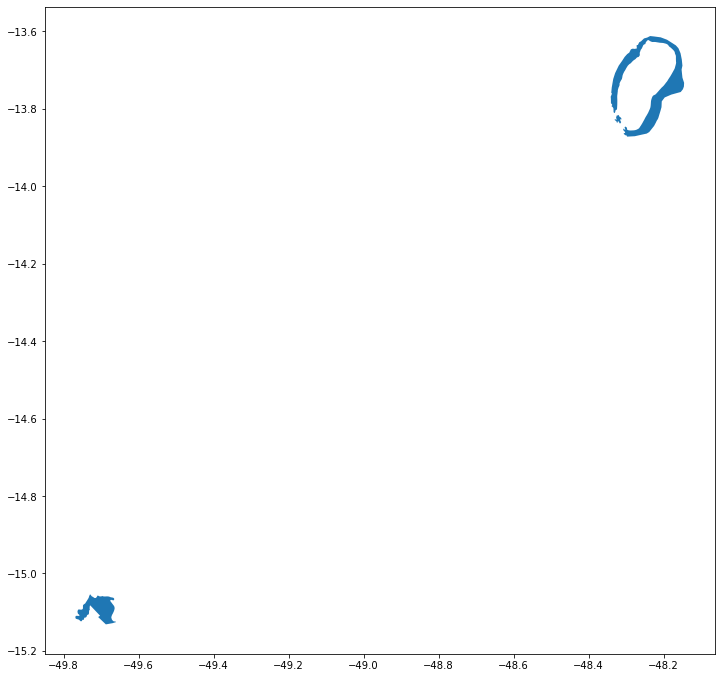

In [58]:
grafita_xisto.plot('SIGLA',figsize=(12,12))

### Filtro geométrico

Já que GeoPandas é alimentado pela Fiona, que é alimentado pelo GDAL, podemos tirar vantagens de pre-filtros quando importamos grandes grupos de dados. Isto pode ser feito geoespacialmente com uma geometria ou uma 'bounding box'. Nós também podemos filtrar linhas carregadas com uma 'slice'.

Este filtro de geometria só carrega os dados que intersectam uma geometria especificada.

Neste caso, escolheremos as geometrias com valores iguais a *'Carta geológica da folha Rio de Janeiro'* - [SF.23 (1 : 1.000.000)]

In [12]:
# Argumento de máscara da função gpd.read_file()
# gdf_mask = gpd.read_file('/path.gpkg',
#                         layer='layer_name',
#                         mask=gdf[gdf.column_name == 'column_value'])

<AxesSubplot:>

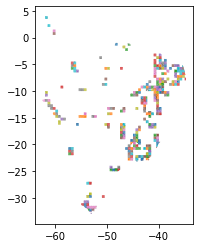

In [15]:
lito_100k.plot('MAPA')

### Filtro funcional

Com este filtro podemos selecionar as subáreas das folhas geológicas mapeadas na escala de 1 : 100.000.
O próximo passo é iterar esta operação para todas as diferentes classes de mapas.

In [22]:
# 'Carta geológica da folha Rio de Janeiro'
varginha = (lito_100k[lito_100k['MAPA'] == 'Carta geológica da folha Varginha - UFRJ'])

<AxesSubplot:>

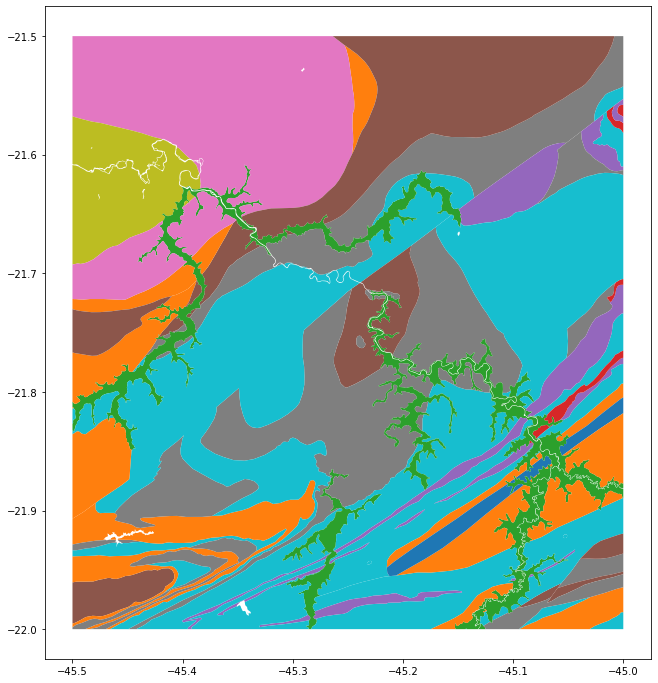

In [26]:
varginha.plot('SIGLA', figsize=(12,12))

In [27]:
varginha.to_file("/home/nazumpa/projetos/ic_cnpq_2021/geo_database/mapas_100k.gpkg",
                    driver='GPKG',
                    layer='varginha')

### Indexing and Selecting Data

GeoPandas inherits the standard pandas methods for indexing/selecting data. This includes label based indexing with .loc and integer position based indexing with .iloc, which apply to both GeoSeries and GeoDataFrame objects. For more information on indexing/selecting, see the pandas documentation.

In addition to the standard pandas methods, GeoPandas also provides coordinate based indexing with the cx indexer, which slices using a bounding box. Geometries in the GeoSeries or GeoDataFrame that intersect the bounding box will be returned.

Using the world dataset, we can use this functionality to quickly select all countries whose boundaries extend into the southern hemisphere.

In [34]:
varginha = gpd.read_file("/home/nazumpa/projetos/ic_cnpq_2021/geo_database/un_litoestratigraficas.gpkg",
                         driver='GPKG',
                         layer='varginha')

In [36]:
varginha.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [35]:
varginha = varginha.set_index("NOME")
varginha.head()

ID_UNIDADE   SIGLA HIERARQUIA  \
NOME                                                                            
Unidade Varginha - Guaxupé - granulítica basal        1647    NPvg    Unidade   
Unidade Varginha - Guaxupé - granulítica basal        1647    NPvg    Unidade   
Unidade Varginha - Guaxupé - granulítica basal        1647    NPvg    Unidade   
Unidade Santo Antonio 4                               4059  NP3asa    Unidade   
Unidade Arantina                                      3998  NP3aar    Unidade   

                                               AMBIENTE_T SUB_AMBIEN  \
NOME                                                                   
Unidade Varginha - Guaxupé - granulítica basal       None       None   
Unidade Varginha - Guaxupé - granulítica basal       None       None   
Unidade Varginha - Guaxupé - granulítica basal       None       None   
Unidade Santo Antonio 4                              None       None   
Unidade Arantina                                     None       None   

                                               SIGLA_PAI  \
NOME                                                       
Unidade Varginha - Guaxupé - granulítica basal       NPv   
Unidade Varginha - Guaxupé - granulítica basal       NPv   
Unidade Varginha - Guaxupé - granulítica basal       NPv   
Unidade Santo Antonio 4                             NP3a   
Unidade Arantina                                    None   

                                                                         NOME_PAI  \
NOME                                                                                
Unidade Varginha - Guaxupé - granulítica basal  NPv - Complexo Varginha - Guaxupé   
Unidade Varginha - Guaxupé - granulítica basal  NPv - Complexo Varginha - Guaxupé   
Unidade Varginha - Guaxupé - granulítica basal  NPv - Complexo Varginha - Guaxupé   
Unidade Santo Antonio 4                                  NP3a - Grupo Andrelândia   
Unidade Arantina                                                             None   

                                                                                          LEGENDA  \
NOME                                                                                                
Unidade Varginha - Guaxupé - granulítica basal                          Unidade granulítica basal   
Unidade Varginha - Guaxupé - granulítica basal                          Unidade granulítica basal   
Unidade Varginha - Guaxupé - granulítica basal                          Unidade granulítica basal   
Unidade Santo Antonio 4                         Biotita xisto/gnaisse rico em plagioclássio, c...   
Unidade Arantina                                Biotita xisto-gnaisse grosso com intercalações...   

                                                   ESCALA  \
NOME                                                        
Unidade Varginha - Guaxupé - granulítica basal  1:100.000   
Unidade Varginha - Guaxupé - granulítica basal  1:100.000   
Unidade Varginha - Guaxupé - granulítica basal  1:100.000   
Unidade Santo Antonio 4                         1:100.000   
Unidade Arantina                                1:100.000   

                                                                                    MAPA  \
NOME                                                                                       
Unidade Varginha - Guaxupé - granulítica basal  Carta geológica da folha Varginha - UFRJ   
Unidade Varginha - Guaxupé - granulítica basal  Carta geológica da folha Varginha - UFRJ   
Unidade Varginha - Guaxupé - granulítica basal  Carta geológica da folha Varginha - UFRJ   
Unidade Santo Antonio 4                         Carta geológica da folha Varginha - UFRJ   
Unidade Arantina                                Carta geológica da folha Varginha - UFRJ   

                                                ...          ERA_MIN  \
NOME                                            ...                    
Unidade Varginha - Guaxupé - gran

### Métodos simples

Agora nós temos nosso GeoDataFrame e podemos iniciar os trabalhos com suas geometrias.

Desde que tenhamos apenas uma coluna de geometria lida do arquivo, esta automaticamente é  vista como a geometria ativa os métodos usados no GeoDataFrame serão aplicados à coluna 'geometry'.

#### Medindo área

Para medir a área de cada polígono (ou Multipolygon neste caso de mapas litológicos), nós podemos usar o atributo GeoDataFrame.area, o qual retorna um panda.Series. Note que GeoDataFrame.area é apenas Geoseries.area aplicado à uma coluna 'geometry' ativa.

Mas primeiro, nós configuramos os nomes das geometrias como 'index', para retornas resultados inteligíveis para nós.

<AxesSubplot:>

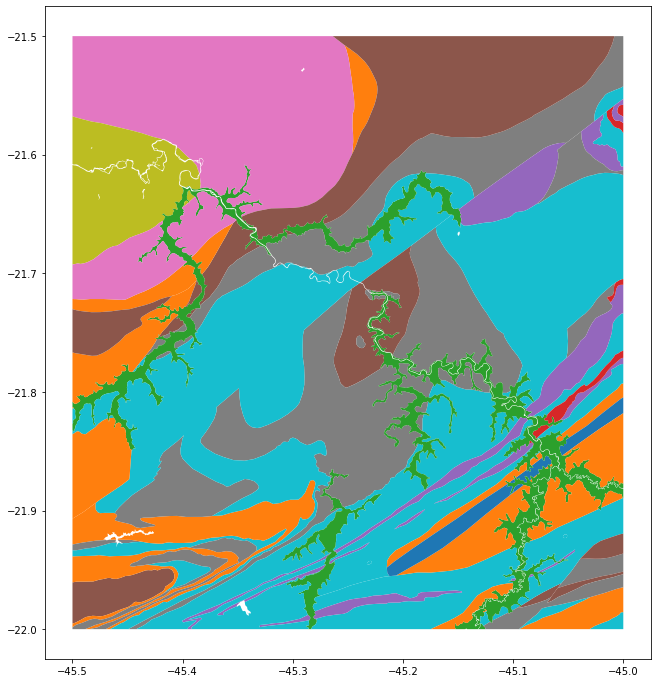

In [37]:
varginha.plot('SIGLA',figsize=(12,12))

In [44]:
varginha_region = (varginha['geometry'].unary_union).bounds
varginha_region

(-45.500000000249976,
 -21.999999999999982,
 -44.999999999999964,
 -21.499999999999993)

### Fazendo mapas

GeoPandas pode, também,  plotar mapas, então podemos checar como nossas geometrias se comportam no espaço. O método chave aqui é GeoDataFrame.plot(). Neste exemplo abaixo, nós plotamos a 'área' que medidos mais cedo usando a coluna 'geometria' ativada. Nós também podemos mostrar uma legenda(legend=True)

Trocando a geometria ativa(GeoDataFrame.set_geometry) para 'centroids', nós podemos plotar o mesmo dado usando as geometrias pontuais que representam o centro da geometria real.

Agora nós configuramos a geometria ativa de volta à GeoSereies original.

In [47]:
varginha = varginha.set_geometry('geometry')

[Veja mais operações ]https://geopandas.org/docs/user_guide/geometric_manipulations.html